In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [30]:
customers = pd.read_csv("customer_data.csv",sep=';')
customers

,customer_id,customer_name,email,city,join_date
0,1,Amit Sharma,amit@gmail.com,Mumbai,2023-01-10
1,2,Neha Verma,neha@gmail.com,Delhi,2023-02-15
2,3,Ravi Patel,ravi@gmail.com,Ahmedabad,2023-03-20
3,4,Pooja Singh,pooja@gmail.com,Mumbai,2023-04-05


In [31]:
order_items = pd.read_csv("order_items.csv",sep=';')
order_items

,order_item_id,order_id,product_id,quantity
0,1,1001,101,2
1,2,1001,104,5
2,3,1002,103,1
3,4,1003,102,3
4,5,1004,104,10


In [32]:
orders = pd.read_csv("orders.csv",sep=';')
orders

,order_id,customer_id,order_date
0,1001,1,2023-06-01
1,1002,2,2023-06-03
2,1003,1,2023-06-10
3,1004,3,2023-06-15


In [33]:
products = pd.read_csv("products.csv",sep=';')
products

,product_id,product_name,category,price
0,101,Tomato,Vegetable,30.0
1,102,Potato,Vegetable,25.0
2,103,Apple,Fruit,120.0
3,104,Banana,Fruit,50.0


In [39]:
orders_per_customer = (
    orders
    .groupby('customer_id')
    .size()
    .reset_index(name='orders')
)
orders_per_customer

,customer_id,orders
0,1,2
1,2,1
2,3,1


In [40]:
monthly_orders = (
    orders
    .groupby('month')
    .size()
    .reset_index(name='orders')
)
monthly_orders

,month,orders
0,2023-06,4


In [41]:
pip install plotly pandas streamlit

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px

In [2]:
customers = pd.read_csv("customer_data.csv",sep=';')
orders = pd.read_csv("orders.csv",sep=';')
products = pd.read_csv("products.csv",sep=';')
order_items = pd.read_csv("order_items.csv",sep=';')

In [3]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['month'] = orders['order_date'].dt.to_period('M').astype(str)

In [5]:
products['price'] = pd.to_numeric(products['price'], errors='coerce')

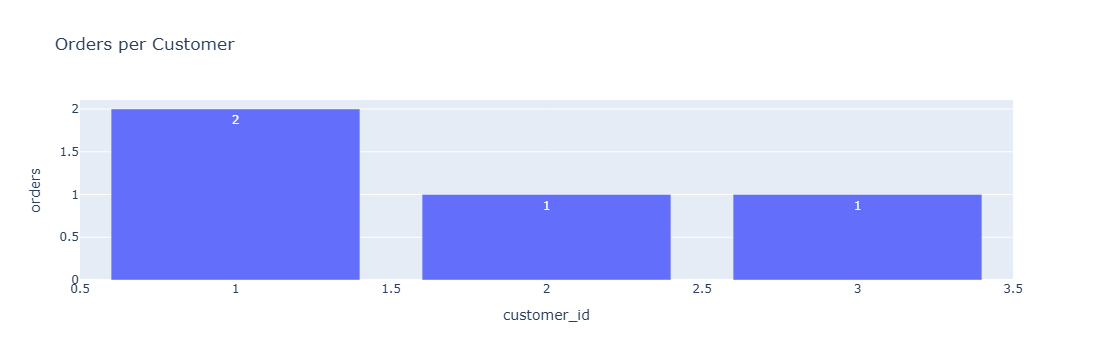

In [8]:
orders_per_customer = (
    orders.groupby('customer_id')
    .size()
    .reset_index(name='orders')
)
fig1 = px.bar(
    orders_per_customer,
    x='customer_id',
    y='orders',
    title="Orders per Customer",
    text='orders'
)
fig1.show()

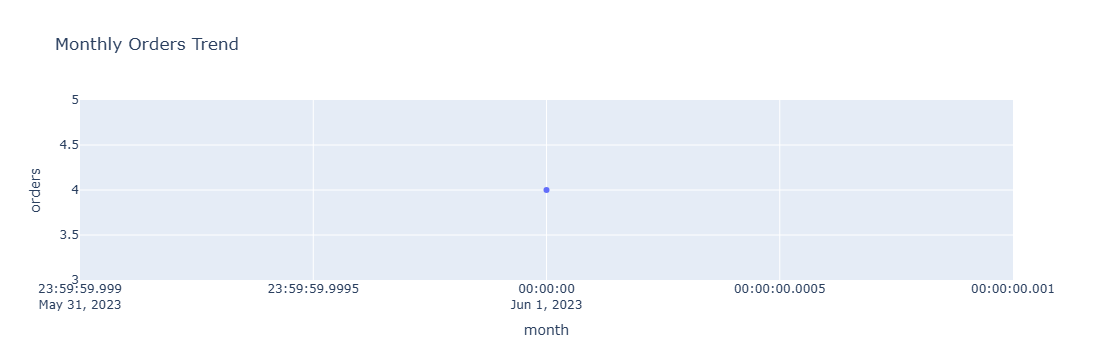

In [9]:
monthly_orders = (
    orders.groupby('month')
    .size()
    .reset_index(name='orders')
)
fig2 = px.line(
    monthly_orders,
    x='month',
    y='orders',
    markers=True,
    title="Monthly Orders Trend"
)
fig2.show()

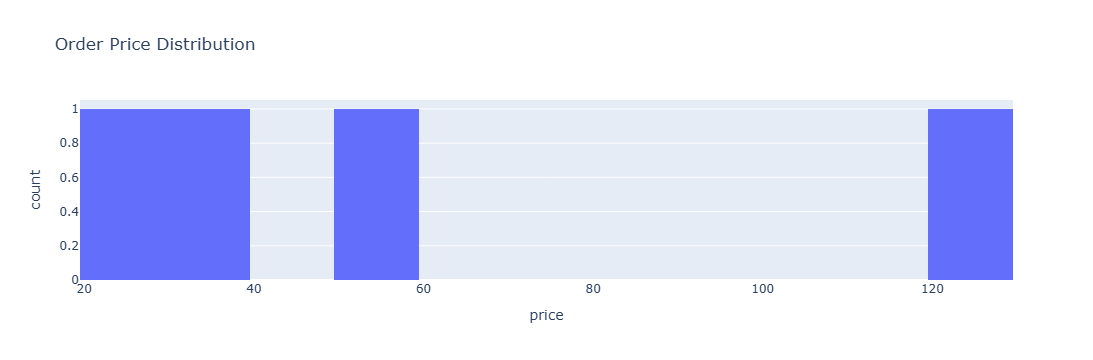

In [11]:
fig3 = px.histogram(
    products,
    x='price',
    nbins=10,
    title="Order Price Distribution"
)
fig3.show()